# IBM - Mental Fitness Tracker

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pex

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures

## Loading the datasets

In [101]:
df1=pd.read_csv("prevalence-by-mental-and-substance-use-disorder _AI.csv")
df2=pd.read_csv("mental-and-substance-use-as-share-of-disease -AI (1).csv")

### Display first 5 rows of the dataset using tail method

In [102]:
df1.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


### Display last 5 rows of the dataset using tail method

In [103]:
df1.tail()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
6835,Zimbabwe,ZWE,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969
6836,Zimbabwe,ZWE,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281
6837,Zimbabwe,ZWE,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805
6838,Zimbabwe,ZWE,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711
6839,Zimbabwe,ZWE,2019,0.211969,0.563820,0.102902,3.283934,0.610644,3.554571,1.776729


### Display the shape of the dataset using shape attribute

In [104]:
df1.shape

(6840, 10)

In [105]:
df2.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [106]:
df2.tail()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
6835,Zimbabwe,ZWE,2015,2.193166
6836,Zimbabwe,ZWE,2016,2.279813
6837,Zimbabwe,ZWE,2017,2.364265
6838,Zimbabwe,ZWE,2018,2.472949
6839,Zimbabwe,ZWE,2019,2.525892


In [107]:
df2.shape

(6840, 4)

## Merging the dataframes

In [108]:
df=pd.merge(df1,df2)

In [109]:
df.head(10)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,AFG,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,AFG,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,AFG,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,AFG,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,AFG,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [110]:
df.tail(10)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
6830,Zimbabwe,ZWE,2010,0.207180,0.556640,0.094490,3.291569,0.618948,3.447127,1.789021,1.606235
6831,Zimbabwe,ZWE,2011,0.207336,0.557104,0.094871,3.292964,0.613875,3.457406,1.779380,1.758867
6832,Zimbabwe,ZWE,2012,0.207741,0.557908,0.095639,3.297124,0.609378,3.480600,1.768782,1.905674
6833,Zimbabwe,ZWE,2013,0.208280,0.558888,0.096950,3.302881,0.603891,3.508534,1.757776,2.024167
6834,Zimbabwe,ZWE,2014,0.208857,0.559929,0.098356,3.309390,0.600724,3.533737,1.746675,2.112216
6835,Zimbabwe,ZWE,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,Zimbabwe,ZWE,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,Zimbabwe,ZWE,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,Zimbabwe,ZWE,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949
6839,Zimbabwe,ZWE,2019,0.211969,0.563820,0.102902,3.283934,0.610644,3.554571,1.776729,2.525892


In [111]:
df.shape

(6840, 11)

### Display No.of Rows and Columns of the new dataframe

In [112]:
print("No.of rows:",df.shape[0])
print("No.of columns:",df.shape[1])

No.of rows: 6840
No.of columns: 11


### Check whether there are any null/missing values in the dataframe

In [113]:
df.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

### Display a heatmap to show null values

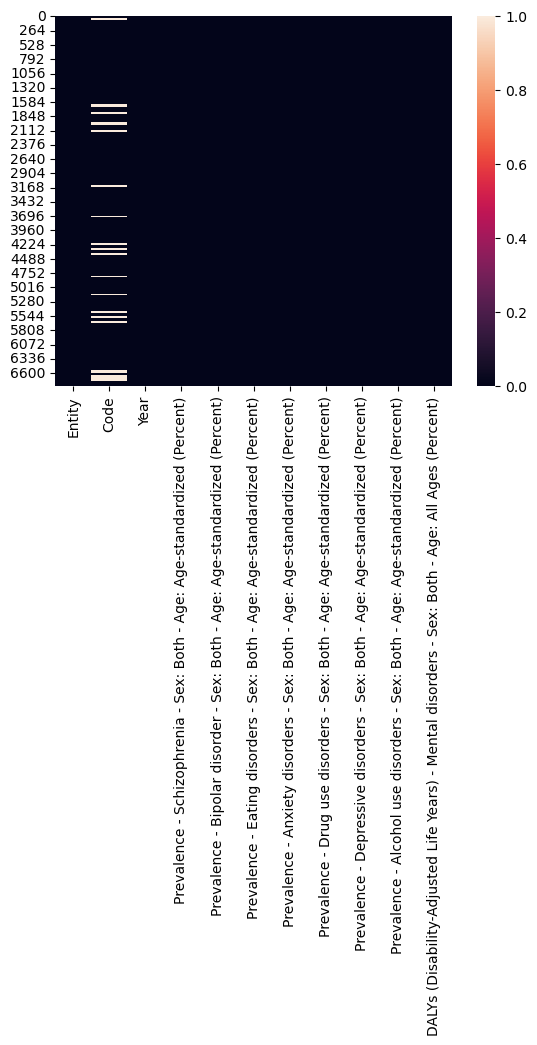

In [114]:
sns.heatmap(df.isnull())
plt.show()

### drop the column that is having missing/null values

In [115]:
df.drop('Code',axis=1,inplace=True)

In [116]:
df.head(10)

,Entity,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [118]:
df.isnull().sum()

Entity                                                                                             0
Year                                                                                               0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                           0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                       0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                    0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)                   0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Perc

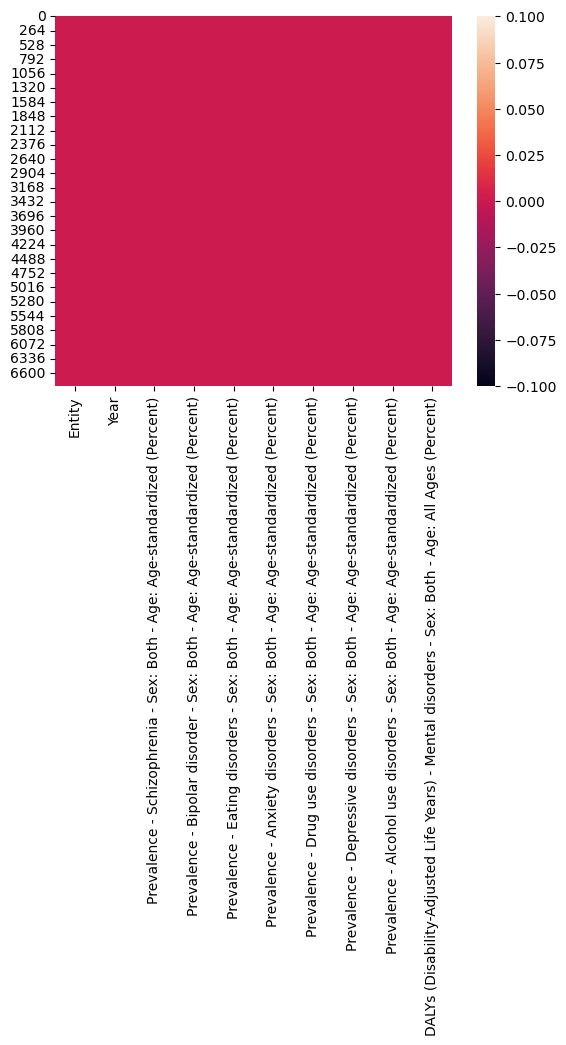

In [119]:
sns.heatmap(df.isnull())
plt.show()

In [120]:
df.size

68400

In [121]:
df.shape

(6840, 10)

### Display the columns of the dataframe

In [122]:
df.columns

Index(['Entity', 'Year',
       'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'],
      dtype='object')

### Change the columns of the dataframe

In [123]:
df.set_axis(['Country','Year','Schizophrenia','Bipolar_disorder','Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'],axis='columns',inplace=True)

### Display the data of the dataframe after changing the columns

In [124]:
df.head(10)

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [125]:
df.tail()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
6835,Zimbabwe,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,Zimbabwe,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,Zimbabwe,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,Zimbabwe,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949
6839,Zimbabwe,2019,0.211969,0.563820,0.102902,3.283934,0.610644,3.554571,1.776729,2.525892


### Display the count of each country

In [126]:
a=df['Country'].value_counts()
print(a)

Afghanistan         30
Northern Ireland    30
Norway              30
OECD Countries      30
Oman                30
                    ..
Guam                30
Guatemala           30
Guinea              30
Guinea-Bissau       30
Zimbabwe            30
Name: Country, Length: 228, dtype: int64


In [127]:
print("No.of different Countries in the dataframe:",len(a))
print(f"In the given dataset,Each country's timeline is \"{df.shape[0]/len(a)}\" years")

No.of different Countries in the dataframe: 228
In the given dataset,Each country's timeline is "30.0" years


### Display a histplot to represent mental_fitness percentage

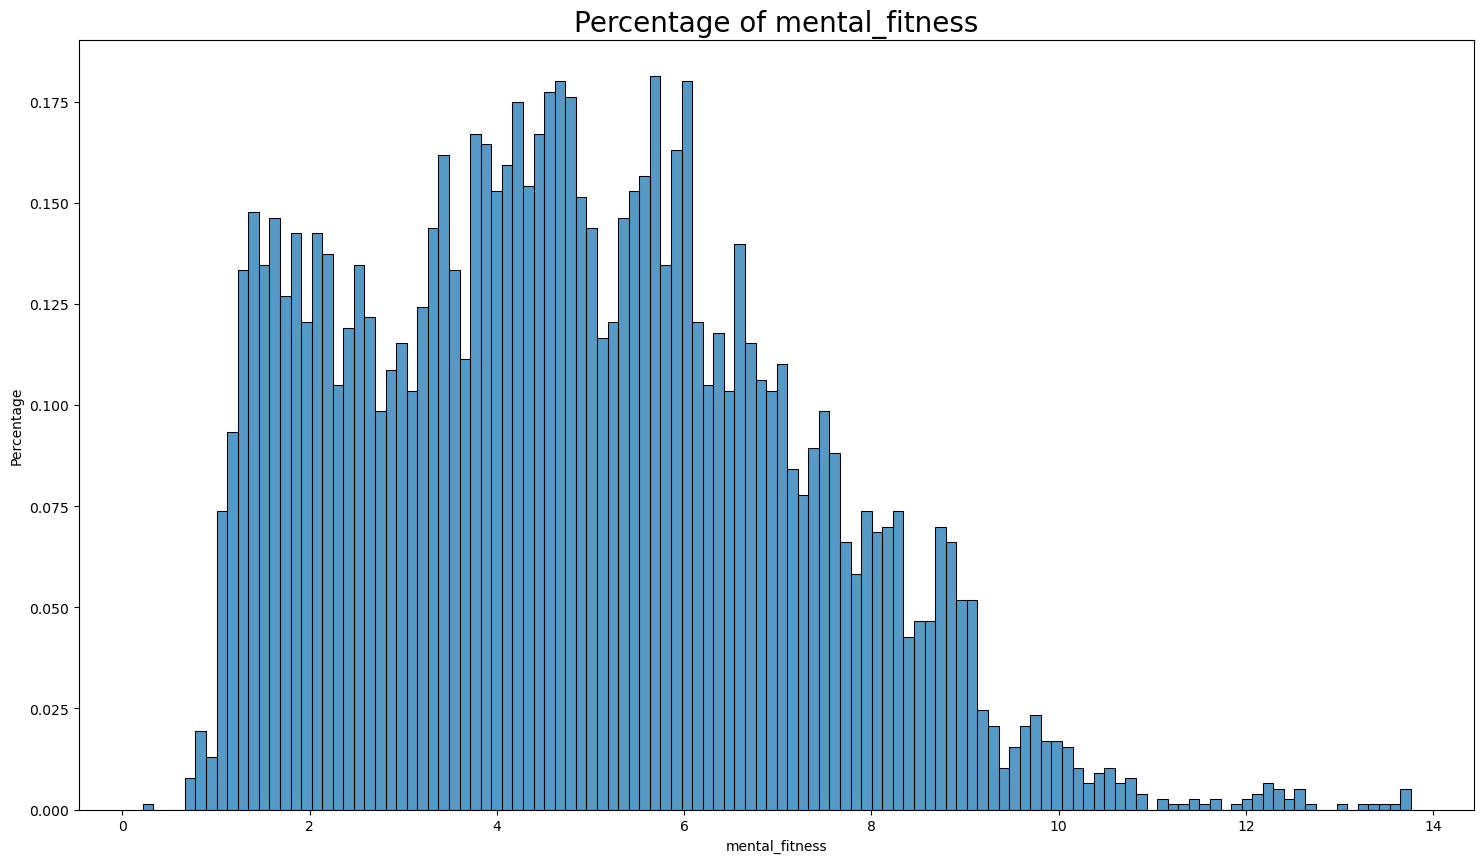

In [128]:
plt.figure(figsize=(18,10))
sns.histplot(df['mental_fitness'],bins=120,stat='density')
plt.ylabel("Percentage")
plt.title("Percentage of mental_fitness",size=20)
plt.show()

### Display graph for each dis-order

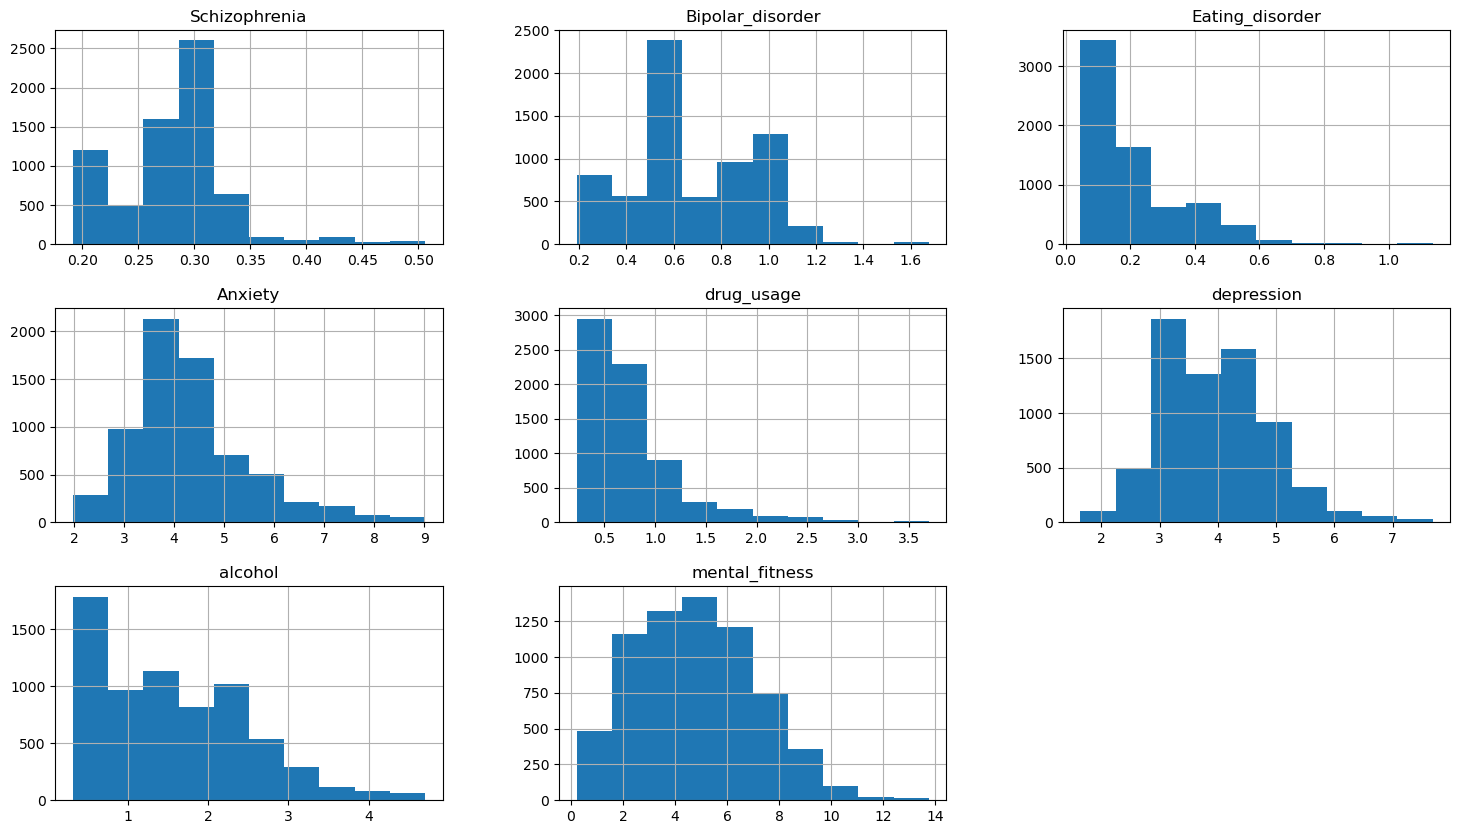

In [129]:
p=df.drop('Country',axis=1)
p=p.drop('Year',axis=1)
p.hist(figsize=(18,10))
plt.show()

### Correlation between columns

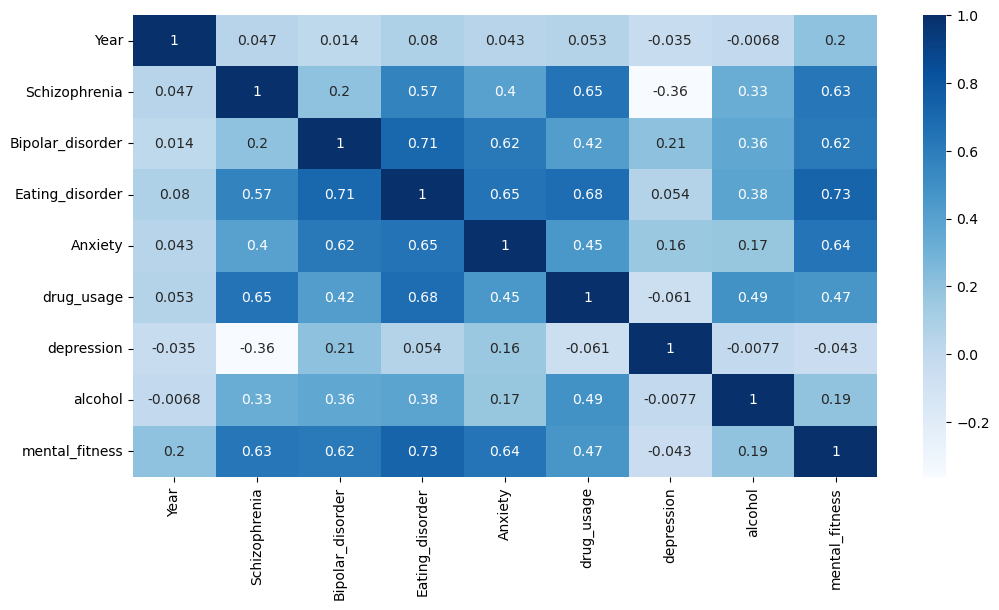

In [130]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

### Display a pairplot for the dataframe

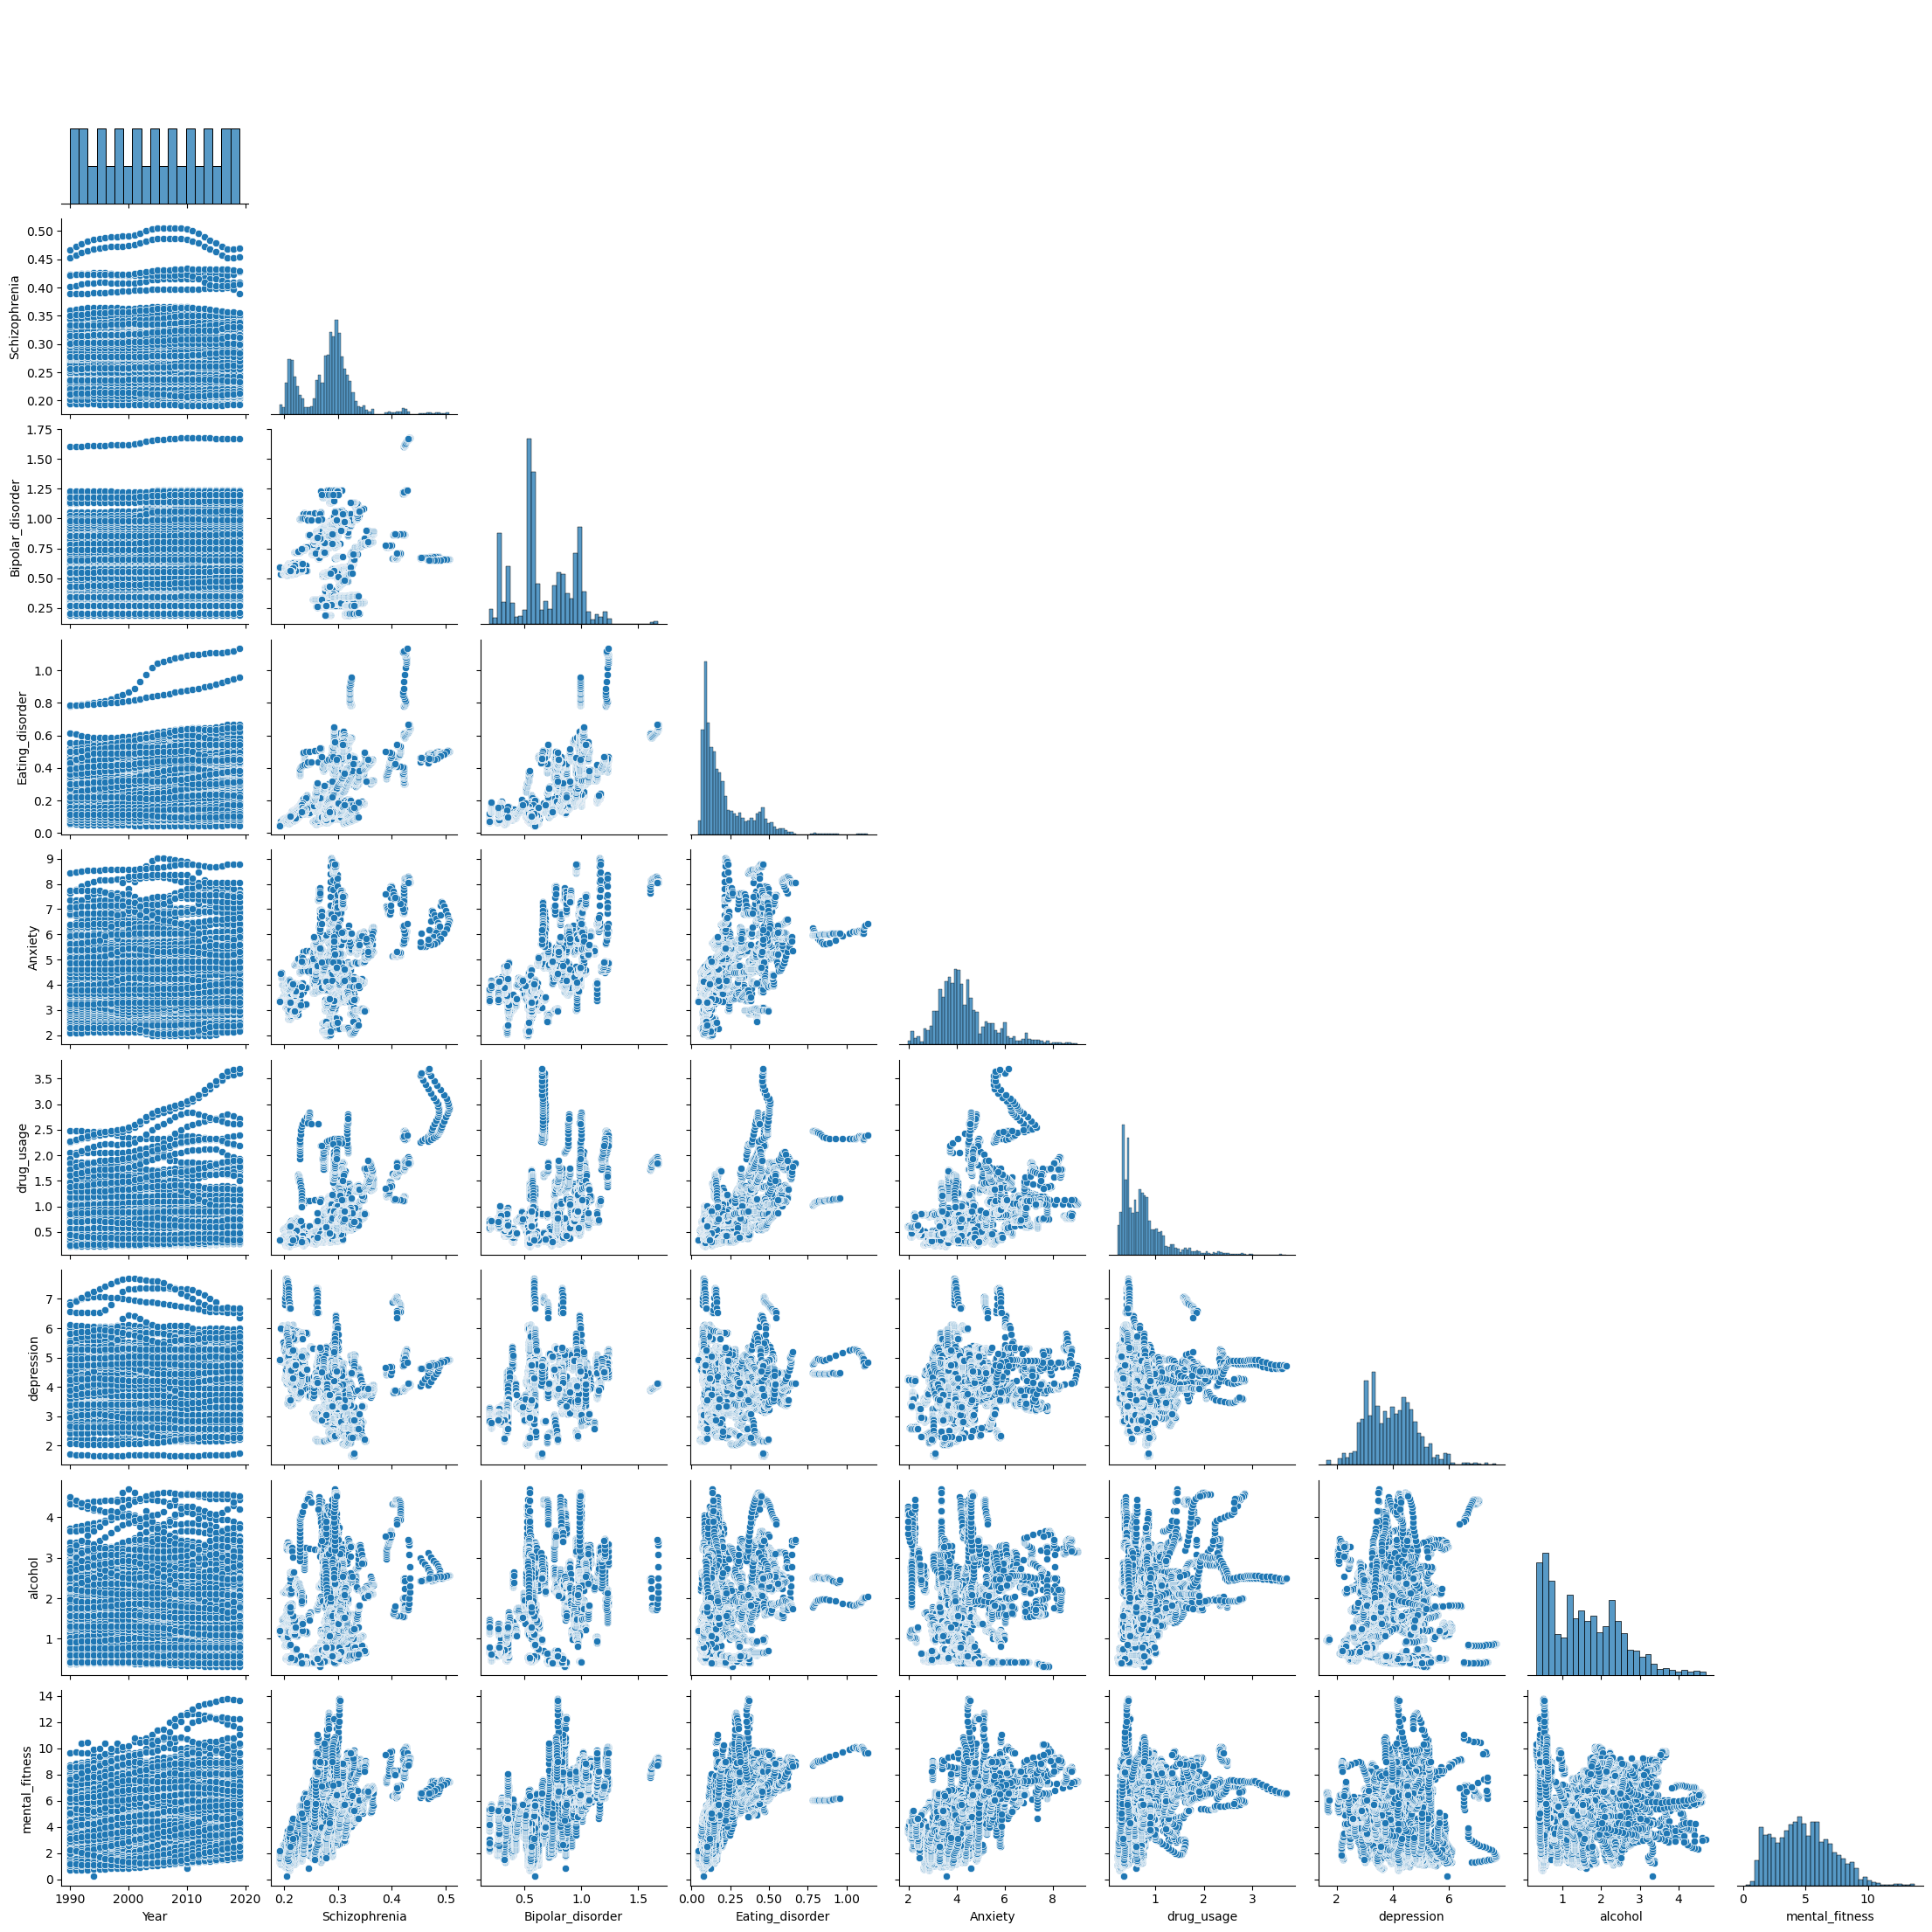

In [131]:
sns.pairplot(data=df,corner=True)
plt.show()

### Calculate the mean of the column mental_fitness in the dataframe

In [132]:
mean=df['mental_fitness'].mean()
mean

4.8180618117506135

### display a piechart for mental_fitness related to year

In [133]:
fig=pex.pie(df,values='mental_fitness',names='Year')
fig.show()

### Display an express line graph

In [134]:
fig=pex.line(df,x='Year',y='mental_fitness',color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [135]:
df.head(10)

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


### Display the information of the dataframe

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


### Display the statistics of the dataframe

In [137]:
df.describe()

,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,0.281167,0.673891,0.211062,4.327525,0.746708,3.950449,1.578807,4.818062
std,8.656074,0.047561,0.258594,0.152559,1.177961,0.463026,0.921021,0.934655,2.294029
min,1990.000000,0.191621,0.189344,0.045425,1.974823,0.225471,1.640902,0.319900,0.215647
25%,1997.000000,0.255468,0.539791,0.099857,3.567064,0.423502,3.258977,0.732826,3.006507
50%,2004.500000,0.287456,0.591893,0.154143,4.094443,0.646050,3.904117,1.460045,4.679177
75%,2012.000000,0.304760,0.897248,0.276891,4.797286,0.890013,4.550505,2.261262,6.387488
max,2019.000000,0.506018,1.676204,1.136541,9.015948,3.699504,7.688213,4.698694,13.761517


In [138]:
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=l.fit_transform(df[i])

In [139]:
df.shape

(6840, 10)

### Splitting the dataframe

In [140]:
X=df.drop('mental_fitness',axis=1)
y=df['mental_fitness']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.20,random_state=2)

In [141]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(5472, 9) (1368, 9) (5472,) (1368,)


## Linear Regression

In [142]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

Y_train_pred=lr.predict(X_train)
mse=mean_squared_error(Y_train,Y_train_pred)
rmse=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
r2=r2_score(Y_train,Y_train_pred)
print("Linear Regression model performance for training set")
print("Mean Squared Error:\t",mse)
print("Root Mean Squared Error:",rmse)
print("r2 score:\t\t",r2)

Linear Regression model performance for training set
Mean Squared Error:	 1.3899593724057975
Root Mean Squared Error: 1.1789653821914354
r2 score:		 0.7413245790025276


## Random Forest Regressoion

In [143]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

Y_train_pred=rf.predict(X_train)
mse=mean_squared_error(Y_train,Y_train_pred)
rmse=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
r2=r2_score(Y_train,Y_train_pred)
print("RandomforestRegressor model performance for training set")
print("Mean Squared Error:\t",mse)
print("Root Mean Squared Error:",rmse)
print("r2 score:\t\t",r2)

RandomforestRegressor model performance for training set
Mean Squared Error:	 0.005075735152264407
Root Mean Squared Error: 0.07124419381440432
r2 score:		 0.9990553911477922


In [144]:
Y_test_pred=lr.predict(X_test)
mse=mean_squared_error(Y_test,Y_test_pred)
rmse=np.sqrt(mean_squared_error(Y_test,Y_test_pred))
r2=r2_score(Y_test,Y_test_pred)
print("Linear Regression model performance for testing set")
print("RandomforestRegressor model performance for training set")
print("Mean Squared Error:\t",mse)
print("Root Mean Squared Error:",rmse)
print("r2 score:\t\t",r2)

Linear Regression model performance for testing set
RandomforestRegressor model performance for training set
Mean Squared Error:	 1.1357545319272397
Root Mean Squared Error: 1.065717848178982
r2 score:		 0.763897408705527


In [145]:
Y_test_pred=rf.predict(X_test)
mse=mean_squared_error(Y_test,Y_test_pred)
rmse=np.sqrt(mean_squared_error(Y_test,Y_test_pred))
r2=r2_score(Y_test,Y_test_pred)
print("RandomforestRegressor model performance for testing set")
print("RandomforestRegressor model performance for training set")
print("Mean Squared Error:\t",mse)
print("Root Mean Squared Error:",rmse)
print("r2 score:\t\t",r2)
model_performance['Random Forest Regression'] = {'MSE':mse,'R-squared':r2}

RandomforestRegressor model performance for testing set
RandomforestRegressor model performance for training set
Mean Squared Error:	 0.030576521437945838
Root Mean Squared Error: 0.174861434964791
r2 score:		 0.9936437005168538


## MLP Regressor

In [146]:

nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, Y_train)
nn_y_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(Y_test, nn_y_pred)
nn_r2 = r2_score(Y_test, nn_y_pred)
model_performance['Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

## Bayesian Ridge Regression

In [147]:
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, Y_train)
bayesian_y_pred = bayesian_model.predict(X_test)
bayesian_mse = mean_squared_error(Y_test, bayesian_y_pred)
bayesian_r2 = r2_score(Y_test, bayesian_y_pred)
model_performance['Bayesian Regression'] = {'MSE': bayesian_mse, 'R-squared': bayesian_r2}

## SVR Regression

In [148]:
svr_model = SVR()
svr_model.fit(X_train, Y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(Y_test, svr_y_pred)
svr_r2 = r2_score(Y_test, svr_y_pred)
model_performance['Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2}

## Polynomial Regression

In [149]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, Y_train)
X_test_poly = poly_features.transform(X_test)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(Y_test, poly_y_pred)
poly_r2 = r2_score(Y_test, poly_y_pred)
model_performance['Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

## Gradient Boosting Regressoion

In [150]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, Y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(Y_test, gb_y_pred)
gb_r2 = r2_score(Y_test, gb_y_pred)
model_performance['Gradient Boosting Regression'] = {'MSE': gb_mse, 'R-squared': gb_r2}

### Display mse and r2 score of all regression models

In [151]:
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()
     

Model: Neural Network Regression
   Mean Squared Error (MSE): 1.423937479117461
   R-squared Score: 0.7039894455974842

Model: Bayesian Regression
   Mean Squared Error (MSE): 1.1356672327829982
   R-squared Score: 0.7639155566006873

Model: Support Vector Regression
   Mean Squared Error (MSE): 4.791171391724006
   R-squared Score: 0.0040031105995592675

Model: Polynomial Regression
   Mean Squared Error (MSE): 0.5365987525669031
   R-squared Score: 0.8884509351228863

Model: Gradient Boosting Regression
   Mean Squared Error (MSE): 0.24494949324304793
   R-squared Score: 0.9490794811156813



## display a plot to show predicted value vs actual value for all regression models

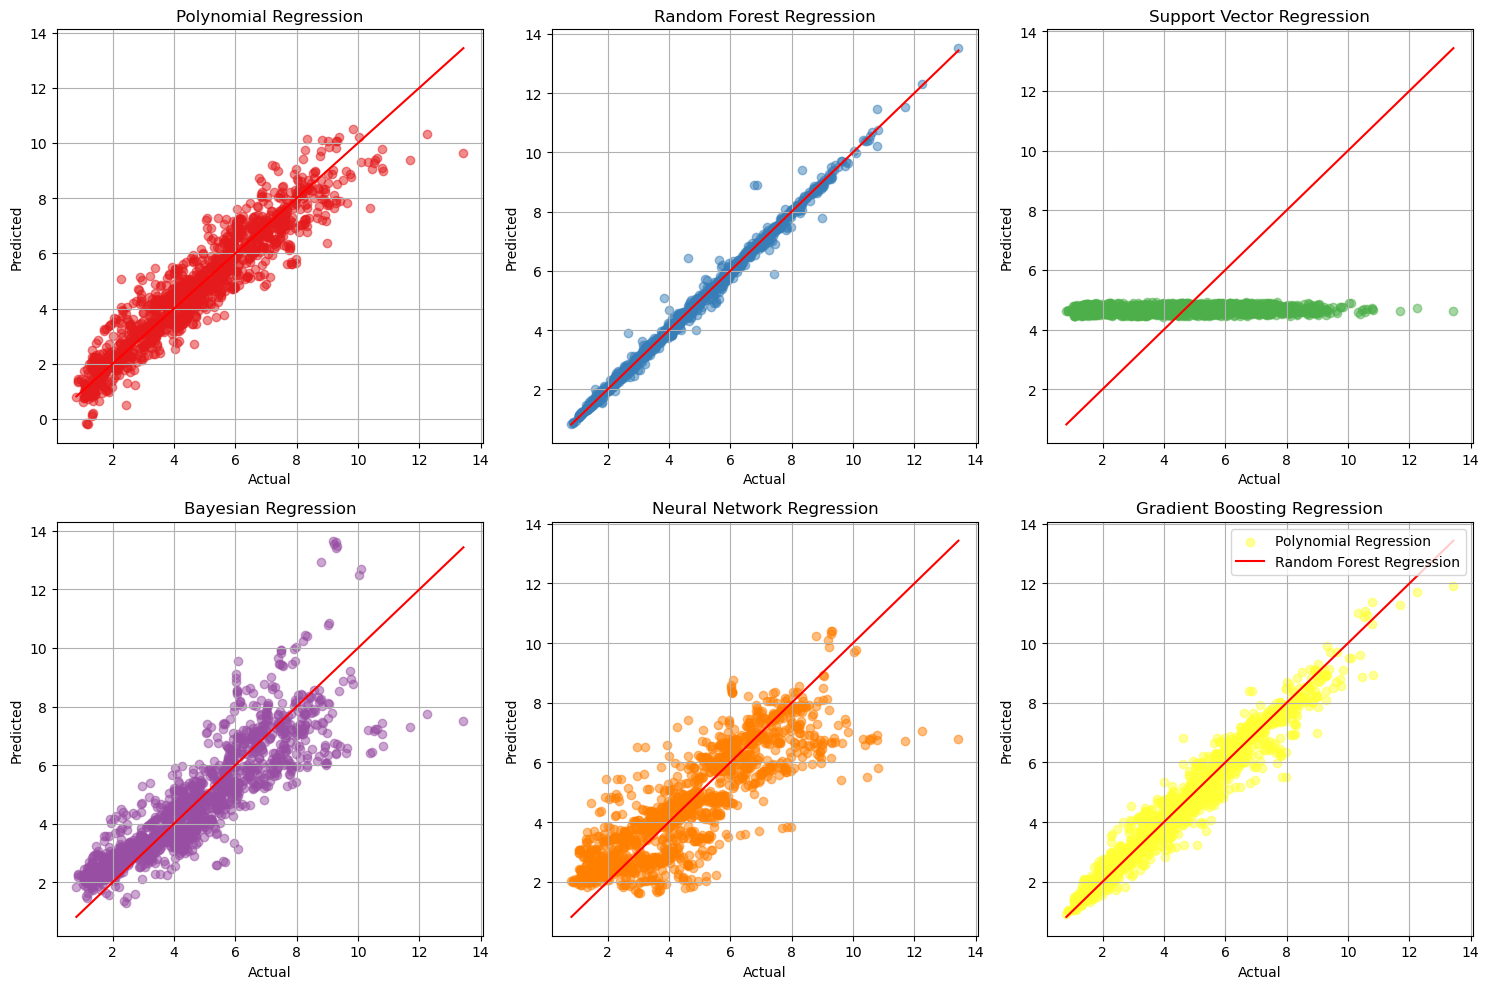

In [152]:
model_performance = {
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': Y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': Y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': Y_test},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': Y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': Y_test},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': Y_test}
}
num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
color_palette = plt.cm.Set1(range(num_models))
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]
    y_pred = performance['Predicted']
    y_actual = performance['Actual']
    ax.scatter(y_actual, y_pred, color=color_palette[i], alpha=0.5, marker='o')
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.grid(True)
fig.tight_layout()
plt.legend(model_performance.keys(), loc='upper right')
plt.show()

## display most and least precise regression models

In [153]:
regression_scores = {
    "Polynomial Regression": (poly_mse, poly_r2),
    "Random Forest Regression": (forest_mse, forest_r2),
    "Gradient Boosting Regression": (gb_mse, gb_r2),
    "Support Vector Regression": (svr_mse, svr_r2),
    "Bayesian Regression": (bayesian_mse, bayesian_r2),
    "Neural Network Regression": (nn_mse, nn_r2),
}
sorted_models = sorted(regression_scores.items(), key=lambda x: (x[1][0], -x[1][1]))
print("Regression Models in Order of Precision:")
for i, (model, scores) in enumerate(sorted_models, start=1):
    print(f"{i}. {model}")
    print("   Mean Squared Error (MSE):", scores[0])
    print("   R-squared Score:", scores[1])
    print()
most_precise_model = sorted_models[0][0]
least_precise_model = sorted_models[-1][0]
print(f"The most precise model is: {most_precise_model}")
print(f"The least precise model is: {least_precise_model}")

Regression Models in Order of Precision:
1. Random Forest Regression
   Mean Squared Error (MSE): 0.03024321084284546
   R-squared Score: 0.9937129896924608

2. Gradient Boosting Regression
   Mean Squared Error (MSE): 0.24494949324304793
   R-squared Score: 0.9490794811156813

3. Polynomial Regression
   Mean Squared Error (MSE): 0.5365987525669031
   R-squared Score: 0.8884509351228863

4. Bayesian Regression
   Mean Squared Error (MSE): 1.1356672327829982
   R-squared Score: 0.7639155566006873

5. Neural Network Regression
   Mean Squared Error (MSE): 1.423937479117461
   R-squared Score: 0.7039894455974842

6. Support Vector Regression
   Mean Squared Error (MSE): 4.791171391724006
   R-squared Score: 0.0040031105995592675

The most precise model is: Random Forest Regression
The least precise model is: Support Vector Regression
